In [1]:
## Chris Kellogg

## ############################################################################
## ############################################################################
##
## Using Data to Improve MLB Attendance
##
## ############################################################################
## ############################################################################

##
## In this assignment, you will be using data on the Los Angeles Dodgers Major
## League Baseball (MLB) team located here: dodgers.csv.
##
## Use this data to make a recommendation to management on how to improve
## attendance. Tell a story with your analysis and clearly explain the steps
## you take to arrive at your conclusion.
##
## This is an open-ended question, and there is no one right answer. You are
## welcome to do additional research and/or use domain knowledge to assist
## your analysis, but clearly state any assumptions you make.
##

In [2]:
##
## load necessary packages
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##
## read the Dodgers data
##

## read the data into a "golden record" copy
df_pristine = pd.read_csv('dodgers-2022.csv')

# preview the "golden record"
df_pristine

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


The first note we should make is that this file seems to be misnamed.  
These dates and attendance numbers are from the Dodgers' 2012 season.

In [4]:
##
## make a working copy
##

# make a working copy of the data (just in case)
df = df_pristine.copy()

# turn the YES/NO promo strings into a 0/1 flag
df.cap = df.apply(
    lambda row: 1 if row.cap == 'YES' else 0,
    axis=1
)
df.shirt = df.apply(
    lambda row: 1 if row.shirt == 'YES' else 0,
    axis=1
)
df.fireworks = df.apply(
    lambda row: 1 if row.fireworks == 'YES' else 0,
    axis=1
)
df.bobblehead = df.apply(
    lambda row: 1 if row.bobblehead == 'YES' else 0,
    axis=1
)

# add a column to indicate if any promotional was active that day
df['is_promo'] = df[['cap','shirt','fireworks','bobblehead',]].max(axis=1)

# add a column to indicate if any promotional was active that day
df['promo'] = df.apply(
    lambda row: 'promo' if row.is_promo == 1 else 'no promo',
    axis=1
)

# turn the day_night string into a 0/1 flag
df['is_night_game'] = df.apply(
    lambda row: 1 if row.day_night == 'Night' else 0,
    axis=1
)

# preview the master data
df

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,is_promo,promo,is_night_game
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0,0,no promo,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0,0,no promo,1
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0,0,no promo,1
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0,1,promo,1
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0,0,no promo,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0,0,0,0,0,no promo,1
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0,0,0,0,0,no promo,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0,0,0,0,0,no promo,1
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0,0,no promo,1


In [5]:
##
## First, let's take a couple subsets of the most-attended games. Maybe
## we'll find that there's something glaringly obvious that they all
## have in common, and we can knock off early.
##

# grab just the top 20 games by attendance
df_top_20 = df.sort_values(['attend'], ascending=False).head(20)

# grab just the top 20 games by attendance
df_top_40 = df.sort_values(['attend'], ascending=False).head(40)

# preview the top 20 games, by attendance
df_top_20

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,is_promo,promo,is_night_game
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0,0,no promo,0
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,0,0,0,1,1,promo,1
39,JUL,1,55359,Sunday,Mets,75,Clear,Night,0,0,0,1,1,promo,1
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,0,0,0,1,1,promo,1
56,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,0,0,0,1,1,promo,1
64,AUG,30,54621,Thursday,Snakes,80,Clear,Night,0,0,0,1,1,promo,1
10,APR,28,54242,Saturday,Nationals,71,Clear,Night,0,0,0,1,1,promo,1
44,JUL,14,54014,Saturday,Padres,75,Clear,Night,0,0,0,1,1,promo,1
42,JUL,4,53570,Wednesday,Reds,70,Clear,Night,0,0,1,0,1,promo,1
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,0,0,0,0,0,no promo,0


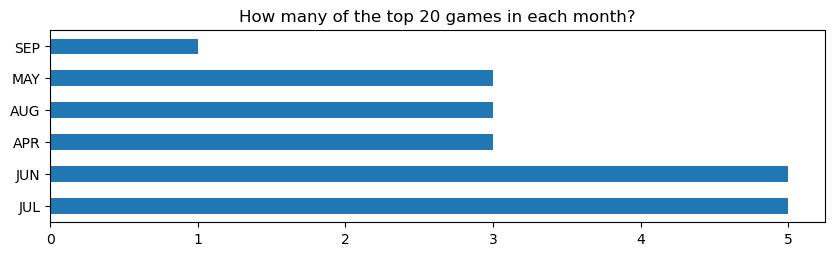

In [6]:
##
## let's look at what month the games are played in
##

# get distribution of the top 20 dates by month
top_20_by_month = df_top_20.month.value_counts()

# plot the top 20 dates by month
fig = plt.figure(figsize=(10, 2.5))
plt.barh(top_20_by_month.index, top_20_by_month, height=0.5)
plt.title('How many of the top 20 games in each month?')
plt.show()

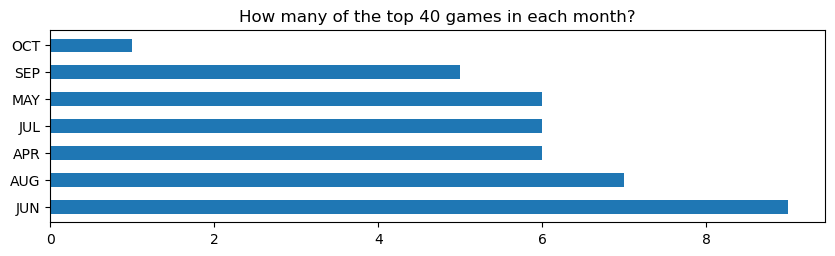

In [7]:
# get distribution of the top 40 dates by month
top_40_by_month = df_top_40.month.value_counts()

# plot the top 40 dates by month
fig = plt.figure(figsize=(10, 2.5))
plt.barh(top_40_by_month.index, top_40_by_month, height=0.5)
plt.title('How many of the top 40 games in each month?')
plt.show()

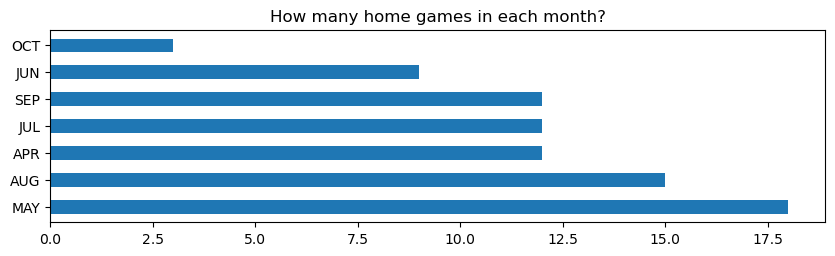

In [8]:
# get distribution of all home dates by month
all_by_month = df.month.value_counts()

# plot all home dates by month
fig = plt.figure(figsize=(10, 2.5))
plt.barh(all_by_month.index, all_by_month, height=0.5)
plt.title('How many home games in each month?')
plt.show()

Well, there's something interesting. The Dodgers only played 9 home games in June, and all 9 of them are in the top 40 (which is the top half of the 81 home dates. And more than half of those June games were in the top 20 in attendance!  Let's just take a quick peek at all the June games (sorted by attendance, highest to lowest) and see if there's anything interesting to note.

In [9]:
# distribution of all the June dates
df_jun = df.query('month == "JUN"').sort_values(['attend'], ascending=False)

df_jun

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,is_promo,promo,is_night_game
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,0,0,0,1,1,promo,1
35,JUN,17,53504,Sunday,White Sox,74,Clear,Day,0,0,0,0,0,no promo,0
30,JUN,11,50559,Monday,Angels,68,Clear,Night,0,1,0,0,1,promo,1
37,JUN,29,49763,Friday,Mets,72,Clear,Night,0,0,1,0,1,promo,1
36,JUN,28,49006,Thursday,Mets,75,Clear,Night,0,0,0,1,1,promo,1
34,JUN,16,45210,Saturday,White Sox,68,Clear,Night,0,0,0,0,0,no promo,1
38,JUN,30,44217,Saturday,Mets,78,Clear,Day,0,0,0,0,0,no promo,0
32,JUN,13,43494,Wednesday,Angels,67,Clear,Night,0,0,0,0,0,no promo,1
33,JUN,15,40432,Friday,White Sox,67,Clear,Night,0,0,1,0,1,promo,1


In [10]:
# check the mean temperatures
print (
    'Mean temperature of:' + '\n' +
    'all games -- ' + str(round(df.temp.mean(),2)) + '\n' +
    'top 40 games -- ' + str(round(df_top_40.temp.mean(),2)) + '\n' +
    'top 20 games -- ' + str(round(df_top_20.temp.mean(),2)) + '\n' +
    'June games -- ' + str(round(df_jun.temp.mean(),2))
)

Mean temperature of:
all games -- 73.15
top 40 games -- 73.45
top 20 games -- 72.9
June games -- 70.56


None of the teams that the Dodgers played in June 2012 were playoff teams that year. It was several degrees cooler in June, but most of the games were at night, so that's not a huge surprise. While we really can't recommend to the Dodgers that they should drive attendance by playing all their games in June, it probably would be a good idea to explore the possibility of having one or two more series in June (like they did in May and August). I'm sure every team would prefer more June and July home games, when school is out, but it's worth noting.

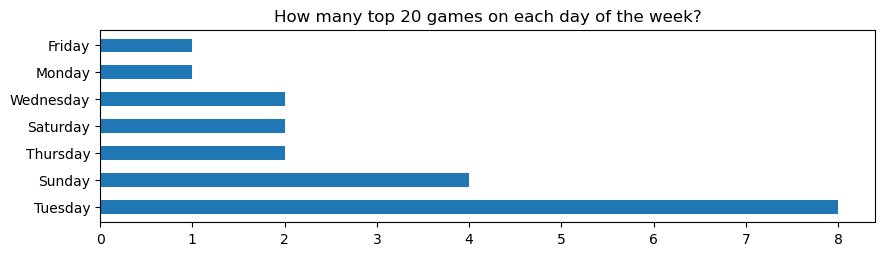

In [11]:
##
## let's look at what day of week the games are played on
##

# get distribution of all home dates by month
top_20_by_day = df_top_20.day_of_week.value_counts()

# plot all home dates by month
fig = plt.figure(figsize=(10, 2.5))
plt.barh(top_20_by_day.index, top_20_by_day, height=0.5)
plt.title('How many top 20 games on each day of the week?')
plt.show()

Wow.  Eight (or about 40%) of the top 20 dates are Tuesdays. I wouldn't have guessed that Tuesdays would be that popular, so I went looking for something to help me put it in perspective.  According to a research project I found online (Puzzanghera), the weekend games (Friday, Saturday, and Sunday) are consistently the most well-attended games, and Tuesdays have, league-wide, the lowest mean attendance. We should investigate what makes Tuesdays at Dodger stadium so popular.

#### Reference
Puzzanghera, S. (n.d.). Game Attendance in Major League Baseball.  
https://rstudio-pubs-static.s3.amazonaws.com/609595_749e7aa53bd54c35b0fb480388d3cb57.html

In [12]:
# dataset of all the Tuesdays
df_tuesday = df \
    .query('day_of_week == "Tuesday"') \
    .sort_values(['attend'], ascending=False)

df_tuesday

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,is_promo,promo,is_night_game
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0,0,no promo,0
59,AUG,21,56000,Tuesday,Giants,75,Clear,Night,0,0,0,1,1,promo,1
31,JUN,12,55279,Tuesday,Angels,66,Cloudy,Night,0,0,0,1,1,promo,1
56,AUG,7,55024,Tuesday,Rockies,80,Clear,Night,0,0,0,1,1,promo,1
47,JUL,17,53498,Tuesday,Phillies,70,Clear,Night,0,0,0,0,0,no promo,1
50,JUL,31,52832,Tuesday,Snakes,75,Cloudy,Night,0,0,0,1,1,promo,1
27,MAY,29,51137,Tuesday,Brewers,74,Clear,Night,0,0,0,1,1,promo,1
19,MAY,15,47077,Tuesday,Snakes,70,Clear,Night,0,0,0,1,1,promo,1
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,0,0,0,0,0,no promo,1
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0,0,no promo,1


Hey!  Six of the 13 Tuesdays at Dodger Stadium in 2012 were bobblehead give-aways, and they were (probably not by chance) 6 of the 8 best attended Tuesdays.  April 10 was the home opener for the Dodgers in 2012, in a year when the team was changing ownership and the new owners had spent BIG in free agency, so it should come as no real surprise that it was a sellout, even with no promo.  Maybe we should see if Tuesdays had a disproportionate number of promotional events.

In [13]:
# check ratios of promos
print (
    'Percentage of dates that are promos:' + '\n' +
    'all games -- ' +
    str(len(df.query('is_promo==1'))) + ' / ' +
    str(len(df)) + ' = ' +
    str(round(len(df.query('is_promo==1'))/len(df),2)) + '\n' +
    'top 20 games -- ' +
    str(len(df_top_20.query('is_promo==1'))) + ' / ' +
    str(len(df_top_20)) + ' = ' +
    str(round(len(df_top_20.query('is_promo==1'))/len(df_top_20),2)) + '\n' +
    'top 40 games -- ' +
    str(len(df_top_40.query('is_promo==1'))) + ' / ' +
    str(len(df_top_40)) + ' = ' +
    str(round(len(df_top_40.query('is_promo==1'))/len(df_top_40),2)) + '\n' +
    'Tuesdays -- ' +
    str(len(df_tuesday.query('is_promo==1'))) + ' / ' +
    str(len(df_tuesday)) + ' = ' +
    str(round(len(df_tuesday.query('is_promo==1'))/len(df_tuesday),2))
)

Percentage of dates that are promos:
all games -- 30 / 81 = 0.37
top 20 games -- 15 / 20 = 0.75
top 40 games -- 22 / 40 = 0.55
Tuesdays -- 8 / 13 = 0.62


Here's something meaty to investigate. Not only do Tuesdays have a heavier dose of promos than the overall schedule, but 75% the top 20 games in attendance were promotionals! Let's look for the correlation between promos and attendance.

In [14]:
df[['attend','is_promo','cap','shirt','fireworks','bobblehead']].corr()[['attend']]

,attend
attend,1.000000
is_promo,0.448887
cap,-0.055002
shirt,0.133269
fireworks,0.002094
bobblehead,0.581895


The correlation between attendance and promos (especially bobbleheads) is notable. It also looks like most of the top 20 games were night games. Let's take a peek at that.

In [15]:
# check ratios of promos
print (
    'Percentage of dates that are night games:' + '\n' +
    'all games -- ' +
    str(len(df.query('is_night_game==1'))) + ' / ' +
    str(len(df)) + ' = ' +
    str(round(len(df.query('is_night_game==1'))/len(df),2)) + '\n' +
    'top 20 games -- ' +
    str(len(df_top_20.query('is_night_game==1'))) + ' / ' +
    str(len(df_top_20)) + ' = ' +
    str(round(len(df_top_20.query('is_night_game==1'))/len(df_top_20),2)) + '\n' +
    'top 40 games -- ' +
    str(len(df_top_40.query('is_night_game==1'))) + ' / ' +
    str(len(df_top_40)) + ' = ' +
    str(round(len(df_top_40.query('is_night_game==1'))/len(df_top_40),2))
)

Percentage of dates that are night games:
all games -- 66 / 81 = 0.81
top 20 games -- 16 / 20 = 0.8
top 40 games -- 33 / 40 = 0.82


It turns out that most of the top 20 games were night games because most of ALL the game were night games!  In fact, the percentage of night games among the top dates and the overall schedule is pretty consistent. Are they typically more heavily attended than day games?

In [16]:
# check means of day/night games
print (
    'Mean attendance at night games:' + '\n' +
    'all night games -- ' +
    str(int(df.query('is_night_game==1').attend.mean())) + '\n' +
    'all day games -- ' +
    str(int(df.query('is_night_game==0').attend.mean()))
)

Mean attendance at night games:
all night games -- 40868
all day games -- 41793


The difference in mean attendance between day games and night games is only about 2% overall. Because there are other considerations (mostly based around team travel and player health/convenience) around choosing whether to play at night, we probably don't want to make a recommendation of scheduling more day games for such a small difference. Let's take one last look at what the mean attendance difference looks on promo dates vs regular dates.

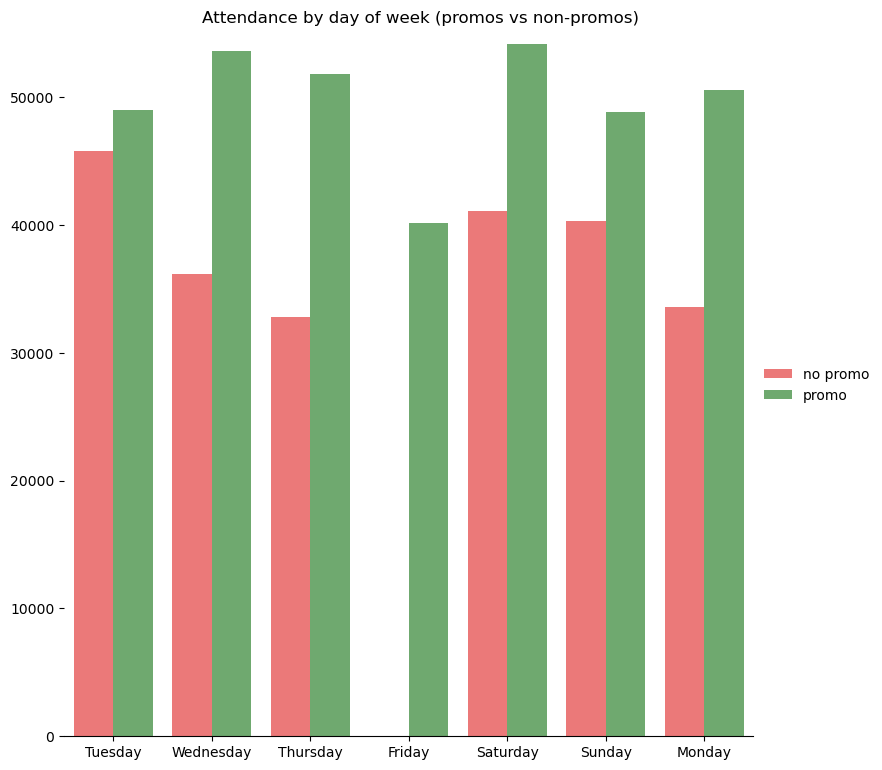

In [17]:
##
## plot attendance by day of week, separated by promos
##

fig = sns.catplot(
    data = df,
    kind = 'bar',
    x = 'day_of_week',
    y = 'attend',
    hue = 'promo',
    errorbar = None,
    palette = ['red','green'],
    alpha = .6,
    height = 8
)
fig.despine(left=True)
fig.set_axis_labels('', '')
fig.legend.set_title('')
fig.fig.suptitle('Attendance by day of week (promos vs non-promos)')

plt.show()

This difference is stark.  It's evident that people love promotions, and we saw earlier that they really seem to like the bobbleheads.

#### Recommendation:
#### The easiest way to increase attendance at Dodger stadium is to offer more promotional giveaways, especially bobbleheads.